In [1]:
# Author and date
import datetime, getpass
user = getpass.getuser()
print(user, datetime.datetime.today())

ubuntu 2020-05-04 03:37:00.595644


In [2]:
%matplotlib inline
from ipywidgets import Image
from matplotlib import pyplot as plt

import datajoint as dj

In [3]:
ls

Assign8_Kristina_Borovkova.ipynb  States.ipynb             dj-samples/
Connection-Copy1.ipynb            University-define.ipynb  dj_local_conf.json
Connection.ipynb                  University-fill.ipynb
README.md                         University-query.ipynb


In [4]:
dj.config['database.user']

'kristina'

In [5]:
schema = dj.schema(f'kristina_states')

Connecting kristina@db.data-science-ust.net:3306


In [6]:
states = dict(
    AL='Alabama',        AK='Alaska',       AZ='Arizona',      AR='Arkansas',
    CA='California',     CO='Colorado',     CT='Connecticut',  DE='Delaware',
    FL='Florida',        GA='Georgia',      HI='Hawaii',       ID='Idaho', 
    IL='Illinois',       IN='Indiana',      IA='Iowa',         KS='Kansas',
    KY='Kentucky',       LA='Louisiana',    ME='Maine',        MD='Maryland',
    MA='Massachusetts',  MI='Michigan',     MN='Minnesota',    MS='Mississippi',
    MO='Missouri',       MT='Montana',      NE='Nebraska',     NV='Nevada',
    NH='New Hampshire',  NJ='New Jersey',   NM='New Mexico',   NY='New York',
    NC='North Carolina', ND='North Dakota', OH='Ohio',         OK='Oklahoma',
    OR='Oregon',         PA='Pennsylvania', RI='Rhode Island', SC='South Carolina',
    SD='South Dakota',   TN='Tennessee',    TX='Texas',        UT='Utah',
    VT='Vermont',        VA='Virginia',     WA='Washington',   WV='West Virginia', 
    WI='Wisconsin',      WY='Wyoming')

In [7]:
@schema
class State(dj.Lookup):
    definition = """
    # United States
    state_code : char(2)
    ---
    state : varchar(20)
    """
    contents = states.items()

In [8]:
State()

state_code,state
AK,Alaska
AL,Alabama
AR,Arkansas
AZ,Arizona
CA,California
CO,Colorado
CT,Connecticut
DE,Delaware
FL,Florida
GA,Georgia


In [9]:
form = {'state': 'newyork'}
Image.from_url("http://www.theus50.com/images/state-birds/{state}-bird.jpg".format(**form))

Image(value=b'http://www.theus50.com/images/state-birds/newyork-bird.jpg', format='url')

In [10]:
Image.from_url("http://www.theus50.com/images/state-flags/{state}-flag.jpg".format(**form))

Image(value=b'http://www.theus50.com/images/state-flags/newyork-flag.jpg', format='url')

In [11]:
Image.from_url("http://www.theus50.com/images/state-flowers/{state}-flower.jpg".format(**form))

Image(value=b'http://www.theus50.com/images/state-flowers/newyork-flower.jpg', format='url')

In [12]:
import requests

@schema
class StateBird(dj.Imported):
    definition = """
    -> State
    ---
    bird_image : longblob    
    """
    
    url_template = "http://www.theus50.com/images/state-birds/{state}-bird.jpg"
    
    def make(self, key):
        state = (State & key).fetch1('state')
        url = self.url_template.format(state=state.lower().replace(' ', ''))
        temp_file = 'tmp.jpg'
        with open(temp_file, 'wb') as f:
            f.write(requests.get(url).content)
        self.insert1(dict(key, bird_image=plt.imread(temp_file)))

In [13]:
StateBird().populate(display_progress=True, suppress_errors=True)

100%|██████████| 50/50 [00:07<00:00,  6.50it/s]


[]

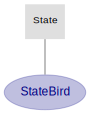

In [14]:
dj.Diagram(schema)

In [15]:
import requests

@schema
class StateFlag(dj.Imported):
    definition = """
    -> State
    ---
    flag_image : longblob    
    """
    
    url_template = "http://www.theus50.com/images/state-flags/{state}-flag.jpg"
    
    def make(self, key):
        state = (State & key).fetch1('state')
        url = self.url_template.format(state=state.lower().replace(' ', ''))
        temp_file = 'tmp.jpg'
        with open(temp_file, 'wb') as f:
            f.write(requests.get(url).content)
        self.insert1(dict(key, flag_image=plt.imread(temp_file)))

In [16]:
StateFlag.populate(display_progress=True)

100%|██████████| 50/50 [00:07<00:00,  7.14it/s]


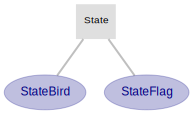

In [17]:
dj.Diagram(schema)

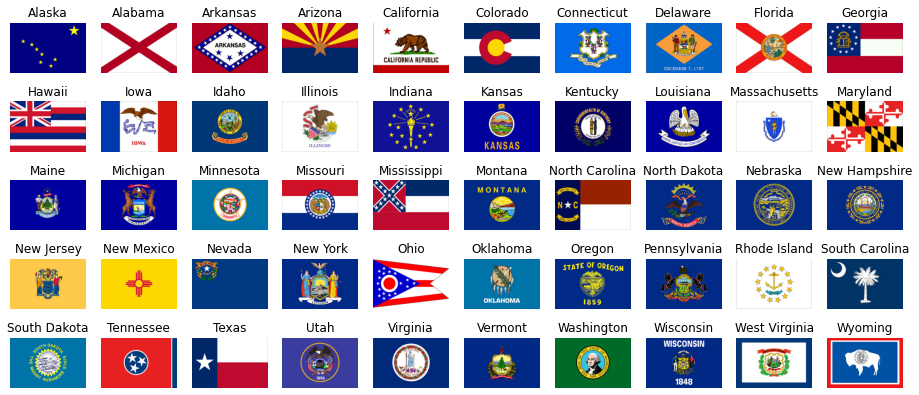

In [18]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State).fetch(as_dict=True)):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

# Home Work

In [19]:
import colorsys
@schema
class StateFlagHSV(dj.Computed):
    definition="""
    -> StateFlag
    ---
    hue : float
    sat : float
    value : float
    """
    def make(self,key):
        img=(StateFlag & key).fetch1('flag_image') #get data from above
        hue, sat, value = colorsys.rgb_to_hsv(*img.mean(axis=(0,1))/255) #value from the mean of the image
        self.insert1(dict(key, hue=hue, sat=sat,value=value)) #then insert it
        print(key)

In [20]:
StateFlagHSV.populate()

{'state_code': 'AK'}
{'state_code': 'AL'}
{'state_code': 'AR'}
{'state_code': 'AZ'}
{'state_code': 'CA'}
{'state_code': 'CO'}
{'state_code': 'CT'}
{'state_code': 'DE'}
{'state_code': 'FL'}
{'state_code': 'GA'}
{'state_code': 'HI'}
{'state_code': 'IA'}
{'state_code': 'ID'}
{'state_code': 'IL'}
{'state_code': 'IN'}
{'state_code': 'KS'}
{'state_code': 'KY'}
{'state_code': 'LA'}
{'state_code': 'MA'}
{'state_code': 'MD'}
{'state_code': 'ME'}
{'state_code': 'MI'}
{'state_code': 'MN'}
{'state_code': 'MO'}
{'state_code': 'MS'}
{'state_code': 'MT'}
{'state_code': 'NC'}
{'state_code': 'ND'}
{'state_code': 'NE'}
{'state_code': 'NH'}
{'state_code': 'NJ'}
{'state_code': 'NM'}
{'state_code': 'NV'}
{'state_code': 'NY'}
{'state_code': 'OH'}
{'state_code': 'OK'}
{'state_code': 'OR'}
{'state_code': 'PA'}
{'state_code': 'RI'}
{'state_code': 'SC'}
{'state_code': 'SD'}
{'state_code': 'TN'}
{'state_code': 'TX'}
{'state_code': 'UT'}
{'state_code': 'VA'}
{'state_code': 'VT'}
{'state_code': 'WA'}
{'state_code'

In [21]:
StateFlagHSV()

state_code,hue,sat,value
AK,0.667975,0.95965,0.492917
AL,0.96966,0.276514,0.886675
AR,0.930848,0.598425,0.63129
AZ,0.00390558,0.403959,0.418169
CA,0.0284273,0.197031,0.835503
CO,0.709041,0.251084,0.476023
CT,0.588196,0.794118,0.828125
DE,0.57916,0.595042,0.618528
FL,0.0177658,0.35568,0.926329
GA,0.9306,0.568943,0.585579


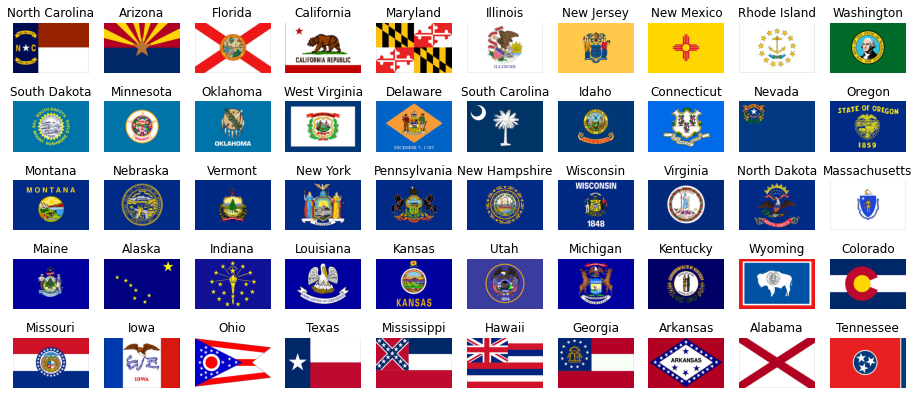

In [22]:
#by hue
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*StateFlagHSV).fetch(as_dict=True, order_by='hue')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

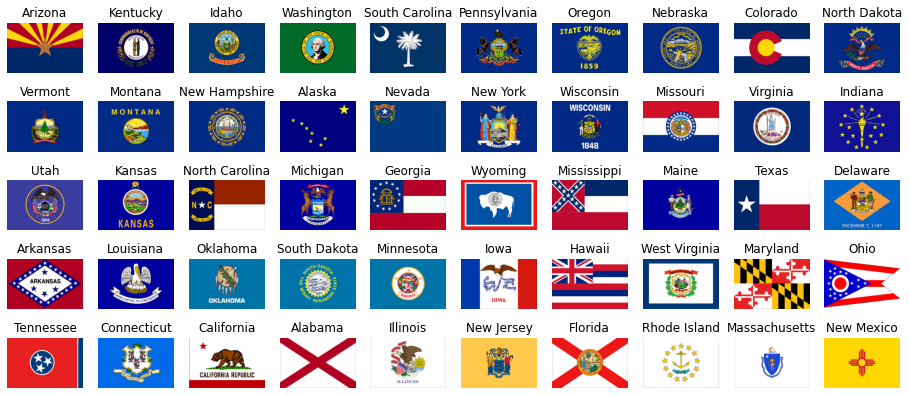

In [23]:
#by value
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*StateFlagHSV).fetch(as_dict=True, order_by='value')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

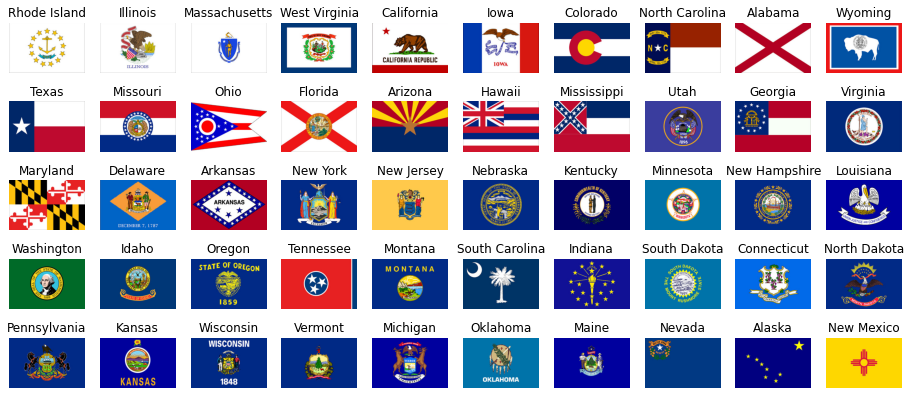

In [24]:
#by sat
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*StateFlagHSV).fetch(as_dict=True, order_by='sat')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

# Prep for the main loop

In [25]:
#library for rgb to hsv
import colorsys

In [26]:
img= (StateFlag & {'state_code':'TX'}).fetch1('flag_image')

In [27]:
StateFlag & {'state_code': 'TX'}

state_code,flag_image
TX,=BLOB=


In [28]:
#image mean 
img.mean(axis=(0,1))

array([154.66584611, 106.16994399, 138.43068986])

In [29]:
#rgb to hsv 
hue, sat, value =colorsys.rgb_to_hsv(*img.mean(axis=(0,1))/255)

# Clean Up

In [ ]:
#schema.drop()